In [2]:
# If this notebook is in a subdirectory of the project's root,
# update the PYTHONPATH to be able to import as usual
import os, sys
project_root = os.path.dirname(os.path.abspath(''))
sys.path.append(project_root)

In [52]:
# Standard Imports
import torch
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from itertools import cycle

# Project Imports
from train import setup
from utils import save_path

In [62]:
hs = np.array([0.8, 0.4, 0.2, 0.1, 0.05])
methods = ['euler-forw', 'euler-symp', 'midpoint']

## Outsource the generation of a single plot

In [63]:
def plot_loss(axes, args):
    N = len(hs)
    step = 0.7/N
    color_dict = {'euler-forw': iter(plt.cm.Blues(0.8 - step*i) for i in range(N)),
                  'euler-symp': iter(plt.cm.Oranges(0.8 - step*i) for i in range(N)),
                  'midpoint': iter(plt.cm.Purples(0.8 - step*i) for i in range(N))}
    
    for method in methods:
        colors = color_dict[method]
        for h in hs:
            # Setup desired args
            args = setup(args | {'loss_type': method, 'h': h}, save_dir_prefix='/results/experiment-')

            # Load loss log
            saved_dict = torch.load(save_path(args), map_location=torch.device('cpu'))
            loss_dict = saved_dict['stats']
            train_loss = loss_dict['train_loss']
            test_loss = loss_dict['test_loss']

            c = next(colors)
            axes.plot(train_loss, "--", color=c)#, label='train loss')
            axes.plot(test_loss, color=c)#, label='test loss')
            
            axes.set_yscale('log')
            axes.set_xlabel("Training Epoch")
            axes.set_ylabel(r"Loss $\mathcal L$")
            axes.set_title(f"{print_name[args.name]}: Training and Test Losses")

## Begin Plotting Code

In [64]:
from visualize import *
mpl.rcParams.update(params)
%matplotlib inline

In [65]:
# TESTING: The below needs all methods for one problem
#hs = np.array([0.1])
#methods = ['euler-symp']
#fig, axes = plt.subplots()
#plot_loss(axes, default_args | {'name': 'twobody'})
#plt.show()

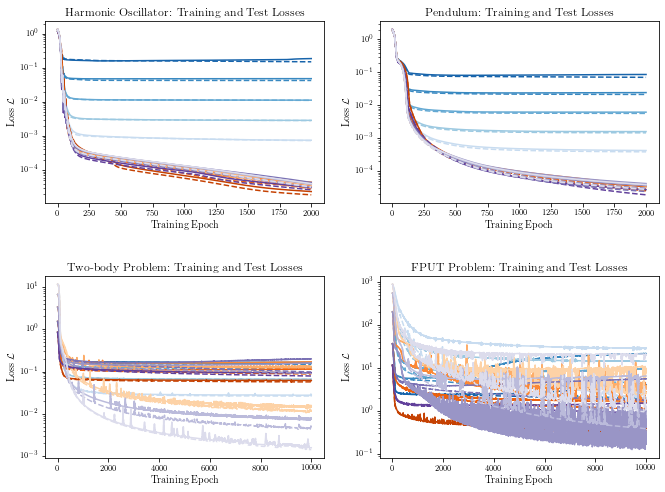

In [66]:
# PLOT ALL TOGETHER
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(11, 13*golden_ratio))
fig.subplots_adjust(wspace=0.2, hspace=0.4)

plot_loss(ax1, default_args | {'name': 'spring'})
plot_loss(ax2, default_args | {'name': 'pendulum'})
plot_loss(ax3, default_args | {'name': 'twobody'})
plot_loss(ax4, default_args | {'name': 'fput'})

fig.savefig("loss-error.pdf", format='pdf', bbox_inches='tight')